In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from lsst.sims.catalogs.generation.db import CatalogDBObject
from lsst.sims.catalogs.generation.db import CatalogDBObject

In [3]:
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catUtils.baseCatalogModels import GalaxyTileObj
from lsst.sims.catalogs.measures.instance import InstanceCatalog
from lsst.sims.utils import ObservationMetaData



/usr/local/manual/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want

In [4]:
from lsst.sims.catUtils.baseCatalogModels import SNObj
from lsst.sims.catUtils.mixins import FrozenSNCat

In [5]:
s  = SNObj()

In [6]:
names = s.get_column_names()

/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geopoint'
  return fn(*arg, **kw)
/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geocenter'
  return fn(*arg, **kw)
/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geobox'
  return fn(*arg, **kw)


In [7]:
for key in names:
    if 'snra' in names[key]:
        print key

TwinkSN


In [8]:
print names['TwinkSN']

['galtileid', 'htmid', 'snid', 't0', 'c', 'x1', 'x0', 'redshift', 'snra', 'sndec', 'cx', 'cy', 'cz']


In [9]:
class SNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'galtileid','t0', 'x0', 'x1', 'c', 'redshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}
                        #'x0':'%8e', 'x1':'%8e', 'c':'%8e', 't0':'%8e'}
        
class TSNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'Tgaltileid','Tt0', 'Tx0', 'Tx1', 'Tc', 'Tredshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}



In [10]:
degConv = np.array([1., 1./60., 1./3600.])
raConv = degConv / 24.0 * 360.
centralRA = np.dot(np.array([3., 32., 30]), raConv) #03h 32m 30s
centralDec = np.dot(np.array([-28, 6., 0.]), degConv)
patchRadius = 0.4 * np.sqrt(2) #np.dot(np.array([0.0, 10.0, 0.]), degConv)

In [11]:
opsimPath = os.path.join('/Users/rbiswas/data/LSST/OpSimData')
opsimDB = os.path.join(opsimPath,'enigma_1189_sqlite.db')

In [12]:
from lsst.sims.catUtils.utils import ObservationMetaDataGenerator

In [13]:
generator = ObservationMetaDataGenerator(driver='sqlite', database=opsimDB) #database = opsimPath, driver='sqlite')
obsMetaDataResults = generator.getObservationMetaData(limit=100,
                                                      fieldRA=(centralRA - 2.0, centralRA + 2.0), 
                                                      fieldDec=(centralDec - 2.0, centralDec + 2.0),
                                                      expMJD=(49500., 49690.),
                                                      boundLength=0.05,
                                                      boundType='circle')

In [14]:
len(obsMetaDataResults)

100

In [15]:
TwinklesObsMetaDataSmall = ObservationMetaData(boundType='circle',pointingRA=centralRA,pointingDec=centralDec,
                                          boundLength=0.05, mjd=60703.0, bandpassName='r', m5=23.)

In [16]:
obsMetaDataResults[35].mjd.TAI

49612.338296000002

In [17]:
TwinklesObsMetaDataSmall = obsMetaDataResults[35]

In [18]:
obsMetaDataResults[35].mjd.TAI

49612.338296000002

In [19]:
TwinklesObsMetaDataSmall.bandpass

'r'

In [20]:
#tsmall = SNCopy(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)

In [21]:
#tsmall.write_catalog('TwinklesSN.dat')

In [22]:
#!wc -l TwinklesSN.dat

In [23]:
#!head TwinklesSN.dat

In [24]:
Ttsmall = TSNCopy(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)

In [25]:
Ttsmall.write_catalog('TTwinklesSN.dat')

In [26]:
!head TTwinklesSN.dat

#raJ2000, decJ2000, snid, Tgaltileid, Tt0, Tx0, Tx1, Tc, Tredshift
9.248542e-01, -4.796086e-01, 70000060002746141, 60002746141.0000, 334.7973, 0.0000, 0.6498, 0.0267, 0.8928
9.248540e-01, -4.796087e-01, 110000060002746141, 60002746141.0000, 1247.8401, 0.0000, -1.7545, 0.0271, 0.8928
9.248529e-01, -4.796095e-01, 40000060002746141, 60002746141.0000, 1829.9147, 0.0000, -0.0453, 0.0032, 0.8928
9.248538e-01, -4.796086e-01, 60002746141, 60002746141.0000, 48.8777, 0.0000, 1.4029, 0.0339, 0.8928
9.248534e-01, -4.796089e-01, 20000060002746141, 60002746141.0000, 2718.1500, 0.0000, -0.1613, 0.0428, 0.8928
9.248540e-01, -4.796088e-01, 120000060002746141, 60002746141.0000, 3049.3672, 0.0000, -0.2035, 0.0507, 0.8928
9.248551e-01, -4.796070e-01, 10000060002746141, 60002746141.0000, 722.5567, 0.0000, 0.3985, 0.0111, 0.8928
9.248543e-01, -4.796073e-01, 30000060002746141, 60002746141.0000, 3445.2848, 0.0000, 0.2358, 0.0516, 0.8928
9.248537e-01, -4.796080e-01, 50000060002746141, 60002746141.0000, 389.946

In [27]:
import pandas as pd
TTSNdf = pd.read_csv('TTwinklesSN.dat', sep=',\s+')

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


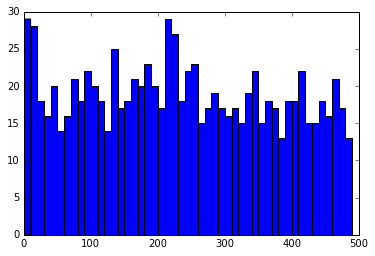

In [28]:
_ = plt.hist(TTSNdf.Tt0, np.arange(0., 500., 10.))

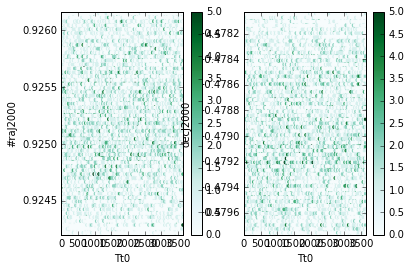

In [29]:
fig, corr_ax = plt.subplots(1, 2)
TTSNdf.plot.hexbin(x='Tt0', y='#raJ2000', ax=corr_ax[0])
#corr_ax[0].plot(centralRA, centralDec, 'ks')
TTSNdf.plot.hexbin(x='Tt0', y='decJ2000', ax=corr_ax[1])

In [30]:
TwinklesObsMetaDataSmall.pointingRA

53.009138473031555

In [31]:
import matplotlib.patches  as mpatches

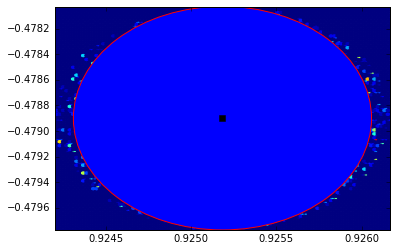

In [32]:
fig, ax = plt.subplots()
ax.hexbin(TTSNdf['#raJ2000'], TTSNdf.decJ2000)
ax.plot(np.radians(TwinklesObsMetaDataSmall.pointingRA), np.radians(TwinklesObsMetaDataSmall.pointingDec), 
         'ks')
circ = mpatches.Circle((np.radians(TwinklesObsMetaDataSmall.pointingRA), np.radians(TwinklesObsMetaDataSmall.pointingDec)), 
         np.radians(0.05))
circ.set(edgecolor='r')
#circ.set(face)
ax.add_artist(circ)

In [33]:
sncatalog = FrozenSNCat(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, 
                         column_outputs=['snra', 'sndec', 'snid', 'x0', 't0', 'flux', 'flux_err', 'mag', 'mag_err',
                                         'TmagNorm', 'TsedFilepath'])
sncatalog.surveyStartDate = 49500.
sncatalog.writeSedFile = False
sncatalog.prefix = '/Users/rbiswas/tmp/'

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)


In [34]:
sncatalog.suppressDimSN = True

In [35]:
_ = sncatalog.write_catalog('newcat.dat', chunk_size=2000)

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1886)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1872)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1884)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 685)


In [36]:
!wc -l newcat.dat

     393 newcat.dat


In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('newcat.dat', sep=',\s+')
df.rename(columns={'#snid':'snid'}, inplace=True)

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [39]:
sncatalog.mjdobs

49612.338296000002

In [40]:
#df.t0.hist(bins=4000)

In [41]:
len(df)

392

In [42]:
df['DeltaT'] = sncatalog.mjdobs - df['t0']
df['SNR'] = df.flux / df.flux_err
df.head()

,snid,snra,sndec,z,t0,c,x1,x0,flux,flux_err,mag,mag_err,TmagNorm,TsedFilepath,DeltaT,SNR
0,70000060001345348,0.924901,-0.479660,0.8308,49634.4989,-0.004487,0.4750,0.000003,3.573111e-11,3.602404e-11,26.1174,0.757033,51.2035,/Users/rbiswas/tmp/specFile_70000060001345348_...,-22.160604,0.991868
1,30000060001345348,0.924900,-0.479660,0.8308,49622.7228,0.142884,-1.3618,0.000002,4.205507e-11,3.603722e-11,25.9405,0.671993,26.3066,/Users/rbiswas/tmp/specFile_30000060001345348_...,-10.384504,1.166990
2,110000060001668441,0.924963,-0.479732,0.8669,49575.7365,-0.003971,-0.7924,0.000003,1.391120e-11,3.597856e-11,27.1416,1.386626,27.1689,/Users/rbiswas/tmp/specFile_110000060001668441...,36.601796,0.386652
3,40000060002021988,0.925073,-0.479665,0.8573,49583.0608,0.055133,-0.5496,0.000002,1.411514e-11,3.597898e-11,27.1258,1.375263,26.8265,/Users/rbiswas/tmp/specFile_40000060002021988_...,29.277496,0.392316
4,70000060010809138,0.925130,-0.479707,0.7744,49531.5629,0.152381,1.8306,0.000003,5.325459e-12,3.596064e-11,28.1841,2.223623,26.9168,/Users/rbiswas/tmp/specFile_70000060010809138_...,80.775396,0.148091


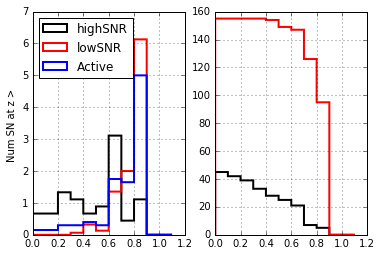

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2);
_ = ax[0].hist(df.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=True,
               label='highSNR')
_ = ax[0].hist(df.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
             normed=True, label='lowSNR')
_ = ax[0].hist(df.query('SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='b', 
             normed=True, label='Active')
ax[0].grid(True)
_ = ax[1].hist(df.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=False, 
               cumulative=-1)
_ = ax[1].hist(df.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
               normed=False, cumulative=-1)
_ = ax[1].grid(True)
_ = ax[0].legend(loc='upper left')
_ = ax[0].set_ylabel('PDF')
_ = ax[0].set_ylabel('Num SN at z > ')

In [44]:
from lsst.sims.catUtils.exampleCatalogDefinitions.phoSimCatalogExamples import PhoSimCatalogSN

In [45]:
pc = PhoSimCatalogSN(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)
pc.writeSedFile = True
pc.surveyStartDate = 49500
pc.suppressDimSN = True

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)


In [46]:
pc.write_catalog('SNPhoSimCatalog.dat')

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 6327)
('writing file to ', 'specFile_60002746141_49612.3383_r.dat')
('writing file to ', 'specFile_10000060006060505_49612.3383_r.dat')
('writing file to ', 'specFile_70000060000184510_49612.3383_r.dat')
('writing file to ', 'specFile_70000060000917091_49612.3383_r.dat')
('writing file to ', 'specFile_60007774784_49612.3383_r.dat')
('writing file to ', 'specFile_60009722297_49612.3383_r.dat')
('writing file to ', 'specFile_10000060001670583_49612.3383_r.dat')
('writing file to ', 'specFile_70000060001345348_49612.3383_r.dat')
('writing file to ', 'specFile_30000060001345348_49612.3383_r.dat')
('writing file to ', 'specFile_110000060001668441_49612.3383_r.dat')
('writing file to ', 'specFile_40000060002021988_49612.3383_r.dat')
('writing file to ', 'specFile_40000060000384557_49612.3383_r.dat')
('writing file

In [47]:
!head SNPhoSimCatalog.dat

Opsim_obshistid 203482
SIM_SEED 22406828
Unrefracted_RA 53.0091385
Unrefracted_Dec -27.4389488
Opsim_moonra 324.684411
Opsim_moondec -8.00760085
Opsim_rotskypos 113.221044
Opsim_filter 2
Opsim_rawseeing 0.453714
Opsim_sunalt -33.7055601
